In [1]:
import flow2graph
from pathlib import Path
import networkx as nx

In [2]:
path_csv = Path("./Datasets/CTU-13-Extended/52.csv.tgz")

ip_malicious = {'147.32.84.165', '147.32.84.191', '147.32.84.192'}
ip_normal = {'147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11'}

In [3]:
dt = flow2graph.NetflowDataset(
        path_csv,
        chunksize=int(1e5),
        ip_malicious=ip_malicious,
        ip_normal=ip_normal
    )

In [4]:
import json
dt_features = dt.get_features()

print("raw dataset features:\n")
print(json.dumps(dt_features, indent=4, separators=(',', ': ')))

print()

total_flows = dt_features['malicious']['n_flows'] + dt_features['normal']['n_flows'] + dt_features['background']['n_flows']
print(f"ratio malicious : {dt_features['malicious']['n_flows']/total_flows:.3f}")
print(f"ratio normal    : {dt_features['normal']['n_flows']/total_flows:.3f}")
print(f"ratio background: {dt_features['background']['n_flows']/total_flows:.3f}")

64it [00:04, 12.89it/s]

raw dataset features:

{
    "malicious": {
        "n_nodes": 3,
        "n_flows": 2029977,
        "flows:": {
            "sum": 2135245838.0,
            "mean": 453.0100888779735,
            "mean_std": 5.416633765921894
        }
    },
    "normal": {
        "n_nodes": 6,
        "n_flows": 116466,
        "flows:": {
            "sum": 51657803.0,
            "mean": 197.771987551362,
            "mean_std": 216.4989572918256
        }
    },
    "background": {
        "n_nodes": 41882,
        "n_flows": 4189408,
        "flows:": {
            "sum": 3200631276.0,
            "mean": 796.8222244799399,
            "mean_std": 678.6354896241679
        }
    }
}

ratio malicious : 0.320
ratio normal    : 0.018
ratio background: 0.661


In [5]:
print("Time window size:", dt._window_time_sec, "seconds")
g_malicious = []
n_labels = None
for (i, df) in enumerate(dt): 
        elapsed = df.time.max() - df.time.min()
        df = dt.compute_features(df, normalize=True)
        g = dt.to_graph(df)
        n_labels = df.label.value_counts()
        
        print('---------------------')
        print("Graph", i)
        print(f'elapsed = {elapsed:0.3f}s')
        print(nx.classes.function.info(g))
        print('n_flow_background =', n_labels.get(flow2graph.Label.background.value,0))
        print('n_flow_normal     =', n_labels.get(flow2graph.Label.normal.value,0))
        print('n_flow_malicious  =', n_labels.get(flow2graph.Label.malicious.value,0))
        if n_labels.get(flow2graph.Label.malicious.value):
            g_malicious.append(g)
        print()
print(len(g_malicious))

Time window size: 60 seconds
---------------------
Graph 0
elapsed = 60.000s
Name: 
Type: DiGraph
Number of nodes: 5532
Number of edges: 10992
Average in degree:   1.9870
Average out degree:   1.9870
n_flow_background = 13179
n_flow_normal     = 4092
n_flow_malicious  = 0

---------------------
Graph 1
elapsed = 59.999s
Name: 
Type: DiGraph
Number of nodes: 5080
Number of edges: 10324
Average in degree:   2.0323
Average out degree:   2.0323
n_flow_background = 12380
n_flow_normal     = 3071
n_flow_malicious  = 0

---------------------
Graph 2
elapsed = 59.999s
Name: 
Type: DiGraph
Number of nodes: 4660
Number of edges: 9531
Average in degree:   2.0453
Average out degree:   2.0453
n_flow_background = 11740
n_flow_normal     = 3999
n_flow_malicious  = 0

---------------------
Graph 3
elapsed = 60.000s
Name: 
Type: DiGraph
Number of nodes: 5075
Number of edges: 10335
Average in degree:   2.0365
Average out degree:   2.0365
n_flow_background = 12532
n_flow_normal     = 4281
n_flow_maliciou

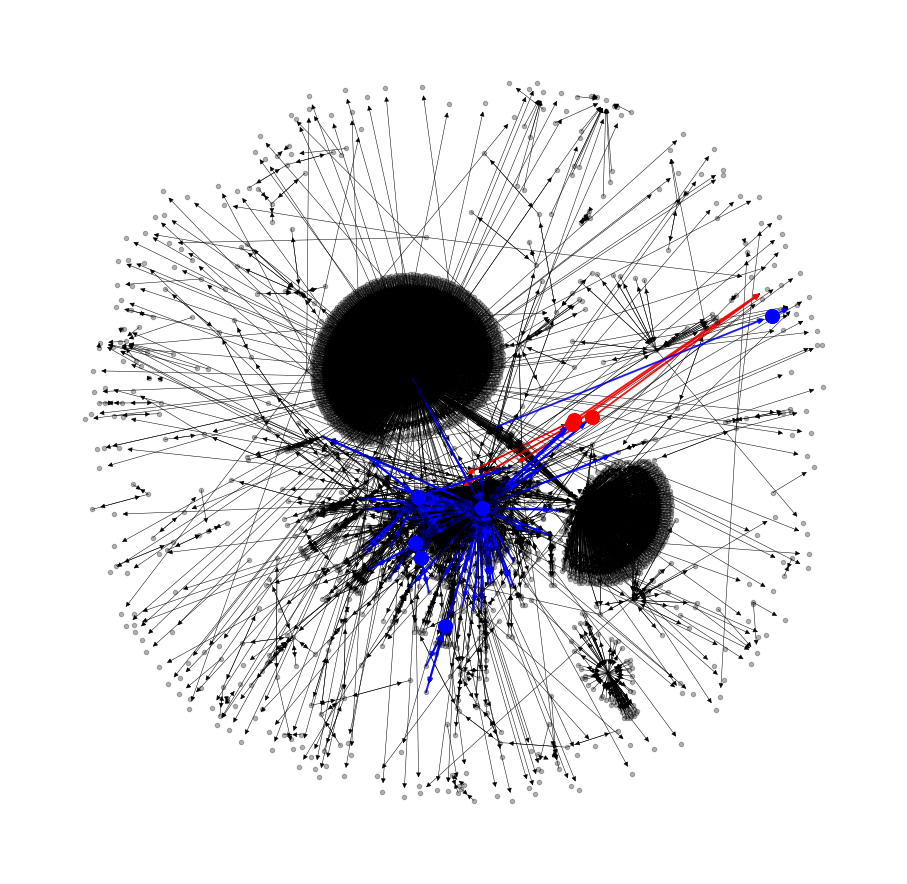

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
flow2graph.plot_flow_graph(g_malicious[0], ip_malicious, ip_normal)